In [1]:
%pip install requests bs4

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [3]:
def scrape_page(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for HTTP errors
    except requests.exceptions.RequestException as e:
        print(f"Error fetching {url}: {e}")
        return pd.DataFrame()  # Return an empty DataFrame on error

    soup = BeautifulSoup(response.content, "html.parser")
    table = soup.find("table")
    if not table:
        return pd.DataFrame()  # Return an empty DataFrame if no table found
    
    # Extract column names
    column_names = [header.get_text(strip=True) for header in table.find_all("th")]
    data = {col_name: [] for col_name in column_names}
    
    # Extract data from each row in the table
    for row in table.find_all("tr"):
        cells = row.find_all("td")
        if cells:
            for i, cell in enumerate(cells):
                # Get the text content of each cell and strip any whitespace
                cell_text = cell.get_text(strip=True)
                # Append the cell content to the corresponding column in the data dictionary
                data[column_names[i]].append(cell_text)
    
    return pd.DataFrame(data)

# URL of the website
base_url = "https://www.scrapethissite.com/pages/forms/"
page_number = 1
all_data = []

# Iterate through each page and scrape data
while True:
    page_url = f"{base_url}?page_num={page_number}"
    try:
        df = scrape_page(page_url)
        if df.empty:
            break  # Stop if no data found on the page
        all_data.append(df)
        page_number += 1
        time.sleep(1)  # Add a delay to avoid overwhelming the server
    except Exception as e:
        print(f"Error processing page {page_url}: {e}")
        break



In [4]:
result_df = pd.concat(all_data, ignore_index=True)

In [5]:
result_df

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,,0.55,299,264,35
1,Buffalo Sabres,1990,31,30,,0.388,292,278,14
2,Calgary Flames,1990,46,26,,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,,0.425,273,298,-25
...,...,...,...,...,...,...,...,...,...
577,Tampa Bay Lightning,2011,38,36,8,0.463,235,281,-46
578,Toronto Maple Leafs,2011,35,37,10,0.427,231,264,-33
579,Vancouver Canucks,2011,51,22,9,0.622,249,198,51
580,Washington Capitals,2011,42,32,8,0.512,222,230,-8


In [6]:
result_df.to_csv('Hockey.csv', index= False)

# Data Analysis on scrapped data

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# OT Losses= Over Time Losses

In [9]:
#result_df

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,,0.55,299,264,35
1,Buffalo Sabres,1990,31,30,,0.388,292,278,14
2,Calgary Flames,1990,46,26,,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,,0.425,273,298,-25
...,...,...,...,...,...,...,...,...,...
577,Tampa Bay Lightning,2011,38,36,8,0.463,235,281,-46
578,Toronto Maple Leafs,2011,35,37,10,0.427,231,264,-33
579,Vancouver Canucks,2011,51,22,9,0.622,249,198,51
580,Washington Capitals,2011,42,32,8,0.512,222,230,-8


In [2]:
import pandas as pd
df= pd.read_csv('Hockey.csv')

In [3]:
df.head()

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,NaN,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,NaN,0.388,292,278,14
2,Calgary Flames,1990,46,26,NaN,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,NaN,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,NaN,0.425,273,298,-25


In [4]:
df.shape

(582, 9)

In [5]:
df.dtypes

Team Name              object
Year                    int64
Wins                    int64
Losses                  int64
OT Losses             float64
Win %                 float64
Goals For (GF)          int64
Goals Against (GA)      int64
+ / -                   int64
dtype: object

In [6]:
df.columns

Index(['Team Name', 'Year', 'Wins', 'Losses', 'OT Losses', 'Win %',
       'Goals For (GF)', 'Goals Against (GA)', '+ / -'],
      dtype='object')

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

Team Name               0
Year                    0
Wins                    0
Losses                  0
OT Losses             224
Win %                   0
Goals For (GF)          0
Goals Against (GA)      0
+ / -                   0
dtype: int64

In [9]:
#drop the column containing null values
df1= df.dropna()


In [10]:
df1.shape

(358, 9)

In [11]:
df1.isna().sum()

Team Name             0
Year                  0
Wins                  0
Losses                0
OT Losses             0
Win %                 0
Goals For (GF)        0
Goals Against (GA)    0
+ / -                 0
dtype: int64

In [12]:
df1['Team Name'].unique()

array(['Mighty Ducks of Anaheim', 'Atlanta Thrashers', 'Boston Bruins',
       'Buffalo Sabres', 'Calgary Flames', 'Carolina Hurricanes',
       'Chicago Blackhawks', 'Colorado Avalanche', 'Dallas Stars',
       'Detroit Red Wings', 'Edmonton Oilers', 'Florida Panthers',
       'Los Angeles Kings', 'Montreal Canadiens', 'Nashville Predators',
       'New Jersey Devils', 'New York Islanders', 'New York Rangers',
       'Ottawa Senators', 'Philadelphia Flyers', 'Phoenix Coyotes',
       'Pittsburgh Penguins', 'San Jose Sharks', 'St. Louis Blues',
       'Tampa Bay Lightning', 'Toronto Maple Leafs', 'Vancouver Canucks',
       'Washington Capitals', 'Columbus Blue Jackets', 'Minnesota Wild',
       'Anaheim Ducks', 'Winnipeg Jets'], dtype=object)

In [13]:
Team_count= df['Team Name'].value_counts()
Team_count

Boston Bruins              21
New Jersey Devils          21
Washington Capitals        21
Vancouver Canucks          21
Buffalo Sabres             21
St. Louis Blues            21
Pittsburgh Penguins        21
Philadelphia Flyers        21
New York Rangers           21
New York Islanders         21
Toronto Maple Leafs        21
Montreal Canadiens         21
Calgary Flames             21
Los Angeles Kings          21
Edmonton Oilers            21
Detroit Red Wings          21
Chicago Blackhawks         21
San Jose Sharks            20
Ottawa Senators            19
Tampa Bay Lightning        19
Dallas Stars               18
Florida Panthers           18
Colorado Avalanche         16
Phoenix Coyotes            15
Carolina Hurricanes        14
Nashville Predators        13
Mighty Ducks of Anaheim    12
Atlanta Thrashers          11
Columbus Blue Jackets      11
Minnesota Wild             11
Winnipeg Jets               7
Hartford Whalers            7
Anaheim Ducks               6
Quebec Nor

<AxesSubplot:title={'center':'Total play Count of Teams '}>

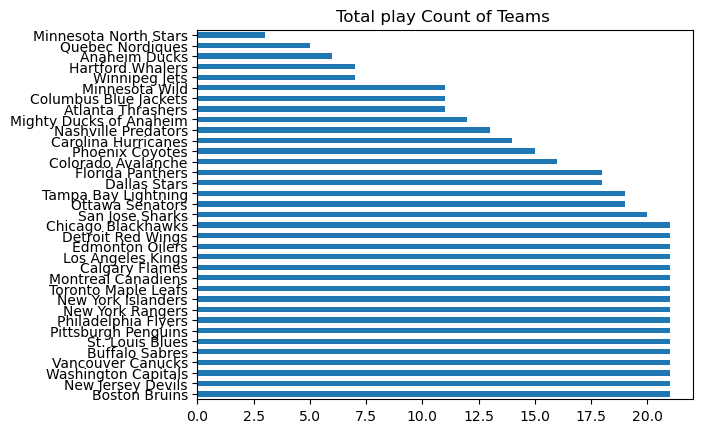

In [14]:
Team_count.plot(kind= 'barh', title= 'Total play Count of Teams ')

### Total Wins

In [15]:
Total_winns= df1.groupby(['Team Name'])['Wins'].sum().reset_index(name='Total_wins')
#Total_winns= df1.groupby(['Team Name'])['Wins'].sum()

In [16]:
Total_winns

,Team Name,Total_wins
0,Anaheim Ducks,257
1,Atlanta Thrashers,342
2,Boston Bruins,472
3,Buffalo Sabres,492
4,Calgary Flames,456
5,Carolina Hurricanes,448
6,Chicago Blackhawks,437
7,Colorado Avalanche,498
8,Columbus Blue Jackets,342
9,Dallas Stars,519


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'Anaheim Ducks'),
  Text(1, 0, 'Atlanta Thrashers'),
  Text(2, 0, 'Boston Bruins'),
  Text(3, 0, 'Buffalo Sabres'),
  Text(4, 0, 'Calgary Flames'),
  Text(5, 0, 'Carolina Hurricanes'),
  Text(6, 0, 'Chicago Blackhawks'),
  Text(7, 0, 'Colorado Avalanche'),
  Text(8, 0, 'Columbus Blue Jackets'),
  Text(9, 0, 'Dallas Stars'),
  Text(10, 0, 'Detroit Red Wings'),
  Text(11, 0, 'Edmonton Oilers'),
  Text(12, 0, 'Florida Panthers'),
  Text(13, 0, 'Los Angeles Kings'),
  Text(14, 0, 'Mighty Ducks of Anaheim'),
  Text(15, 0, 'Minnesota Wild'),
  Text(16, 0, 'Montreal Canadiens'),
  Text(17, 0, 'Nashville Predators'),
  Text(18, 0, 'New Jersey Devils'),
  Text(19, 0, 'New York Islanders'),
  Text(20, 0, 'New York Rangers'),
  Text(21, 0, 'Ottawa Senators'),
  Text(22, 0, 'Philadelphia Flyers'),
  Text(23, 0, 'Phoenix Coyotes'),
  Text(24,

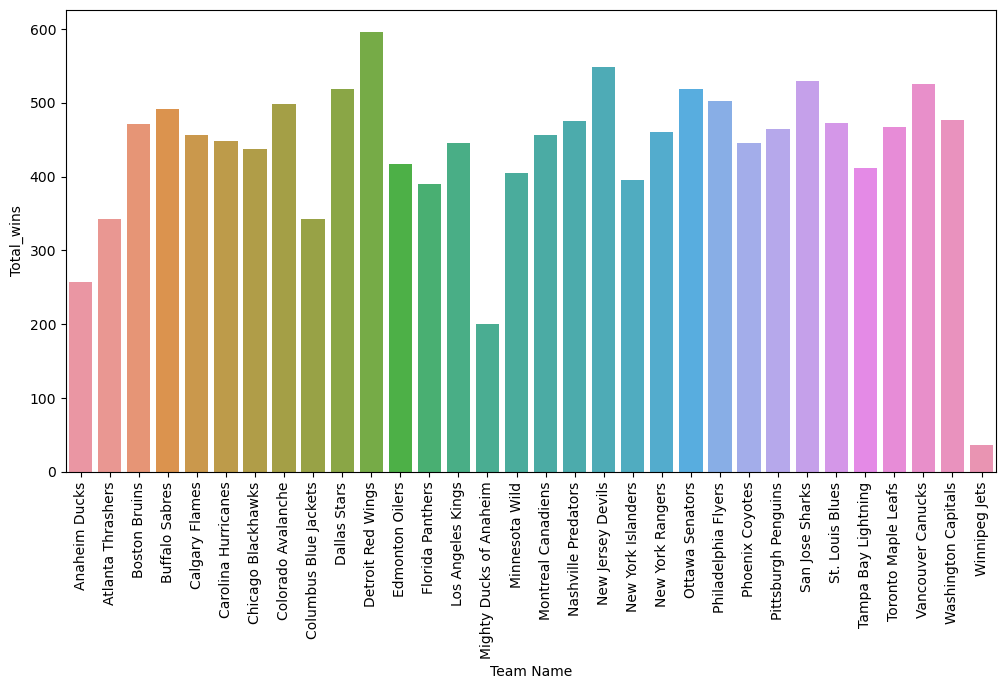

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(data= Total_winns, x= 'Team Name', y= 'Total_wins')
plt.xticks(rotation = 90)

#### From above visualization it is concluded that team 'Detroit Red Wings' has won maximum matches.

### Total_losses

In [23]:
Total_losses= df1.groupby('Team Name')['Losses'].sum().reset_index(name='Total_losses')

In [24]:
Total_losses

,Team Name,Total_losses
0,Anaheim Ducks,178
1,Atlanta Thrashers,437
2,Boston Bruins,347
3,Buffalo Sabres,365
4,Calgary Flames,377
5,Carolina Hurricanes,390
6,Chicago Blackhawks,400
7,Colorado Avalanche,359
8,Columbus Blue Jackets,441
9,Dallas Stars,326


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'Anaheim Ducks'),
  Text(1, 0, 'Atlanta Thrashers'),
  Text(2, 0, 'Boston Bruins'),
  Text(3, 0, 'Buffalo Sabres'),
  Text(4, 0, 'Calgary Flames'),
  Text(5, 0, 'Carolina Hurricanes'),
  Text(6, 0, 'Chicago Blackhawks'),
  Text(7, 0, 'Colorado Avalanche'),
  Text(8, 0, 'Columbus Blue Jackets'),
  Text(9, 0, 'Dallas Stars'),
  Text(10, 0, 'Detroit Red Wings'),
  Text(11, 0, 'Edmonton Oilers'),
  Text(12, 0, 'Florida Panthers'),
  Text(13, 0, 'Los Angeles Kings'),
  Text(14, 0, 'Mighty Ducks of Anaheim'),
  Text(15, 0, 'Minnesota Wild'),
  Text(16, 0, 'Montreal Canadiens'),
  Text(17, 0, 'Nashville Predators'),
  Text(18, 0, 'New Jersey Devils'),
  Text(19, 0, 'New York Islanders'),
  Text(20, 0, 'New York Rangers'),
  Text(21, 0, 'Ottawa Senators'),
  Text(22, 0, 'Philadelphia Flyers'),
  Text(23, 0, 'Phoenix Coyotes'),
  Text(24,

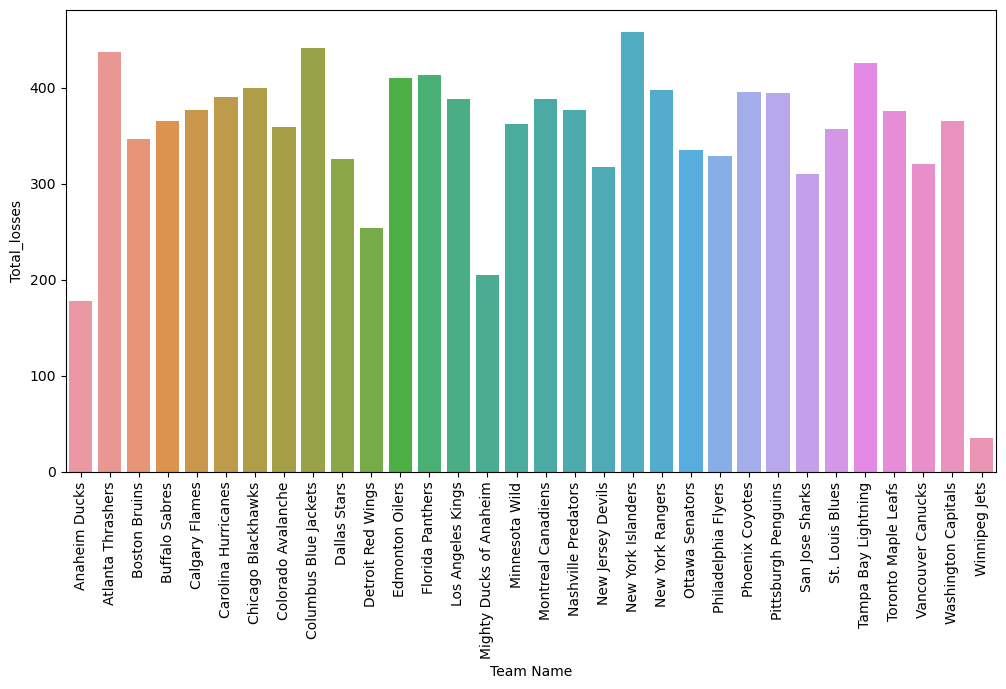

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(data= Total_losses, x= 'Team Name', y= 'Total_losses',)
plt.xticks(rotation = 90)

#### From above visualization it is concluded that team 'New York Islanders' has loose maximum matches.

### Calculate ' Net win % for each team' 

In [26]:
df2= pd.merge(Total_winns, Total_losses, on= 'Team Name', how= 'inner')

In [27]:
df2

,Team Name,Total_wins,Total_losses
0,Anaheim Ducks,257,178
1,Atlanta Thrashers,342,437
2,Boston Bruins,472,347
3,Buffalo Sabres,492,365
4,Calgary Flames,456,377
5,Carolina Hurricanes,448,390
6,Chicago Blackhawks,437,400
7,Colorado Avalanche,498,359
8,Columbus Blue Jackets,342,441
9,Dallas Stars,519,326


In [28]:
df2['net_win_%'] = (df2['Total_wins'] / (df2['Total_wins'] + df2['Total_losses']))*100

In [29]:
df2

,Team Name,Total_wins,Total_losses,net_win_%
0,Anaheim Ducks,257,178,59.080460
1,Atlanta Thrashers,342,437,43.902439
2,Boston Bruins,472,347,57.631258
3,Buffalo Sabres,492,365,57.409568
4,Calgary Flames,456,377,54.741897
5,Carolina Hurricanes,448,390,53.460621
6,Chicago Blackhawks,437,400,52.210275
7,Colorado Avalanche,498,359,58.109685
8,Columbus Blue Jackets,342,441,43.678161
9,Dallas Stars,519,326,61.420118


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'Anaheim Ducks'),
  Text(1, 0, 'Atlanta Thrashers'),
  Text(2, 0, 'Boston Bruins'),
  Text(3, 0, 'Buffalo Sabres'),
  Text(4, 0, 'Calgary Flames'),
  Text(5, 0, 'Carolina Hurricanes'),
  Text(6, 0, 'Chicago Blackhawks'),
  Text(7, 0, 'Colorado Avalanche'),
  Text(8, 0, 'Columbus Blue Jackets'),
  Text(9, 0, 'Dallas Stars'),
  Text(10, 0, 'Detroit Red Wings'),
  Text(11, 0, 'Edmonton Oilers'),
  Text(12, 0, 'Florida Panthers'),
  Text(13, 0, 'Los Angeles Kings'),
  Text(14, 0, 'Mighty Ducks of Anaheim'),
  Text(15, 0, 'Minnesota Wild'),
  Text(16, 0, 'Montreal Canadiens'),
  Text(17, 0, 'Nashville Predators'),
  Text(18, 0, 'New Jersey Devils'),
  Text(19, 0, 'New York Islanders'),
  Text(20, 0, 'New York Rangers'),
  Text(21, 0, 'Ottawa Senators'),
  Text(22, 0, 'Philadelphia Flyers'),
  Text(23, 0, 'Phoenix Coyotes'),
  Text(24,

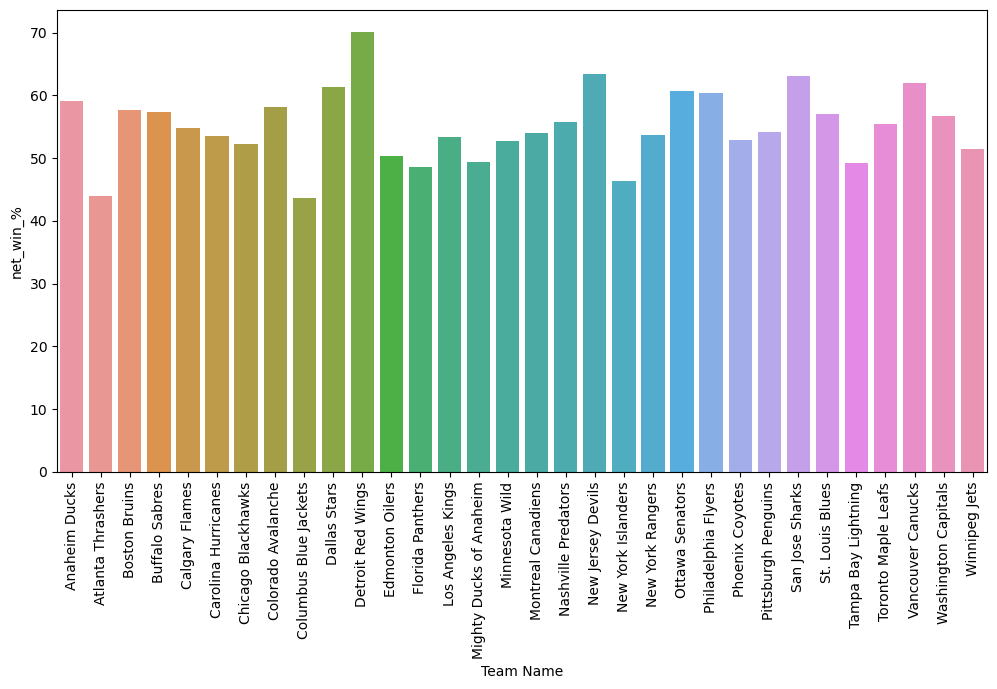

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(data= df2, x= 'Team Name', y= 'net_win_%')
plt.xticks(rotation = 90)

#### Team 'Detroit Red Wings' has maximum won%.

### 5. Top 5 teams with highest win %

In [31]:
top5_teams = df2.sort_values(by= 'net_win_%', ascending= False).head()
top5_teams

,Team Name,Total_wins,Total_losses,net_win_%
10,Detroit Red Wings,596,254,70.117647
18,New Jersey Devils,549,317,63.394919
25,San Jose Sharks,529,310,63.051251
29,Vancouver Canucks,525,321,62.056738
9,Dallas Stars,519,326,61.420118


#### Here Team 'Detroit Red Wings' has maximum net win % ' that mean this team has won maximum times than other teams

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Detroit Red Wings'),
  Text(1, 0, 'New Jersey Devils'),
  Text(2, 0, 'San Jose Sharks'),
  Text(3, 0, 'Vancouver Canucks'),
  Text(4, 0, 'Dallas Stars')])

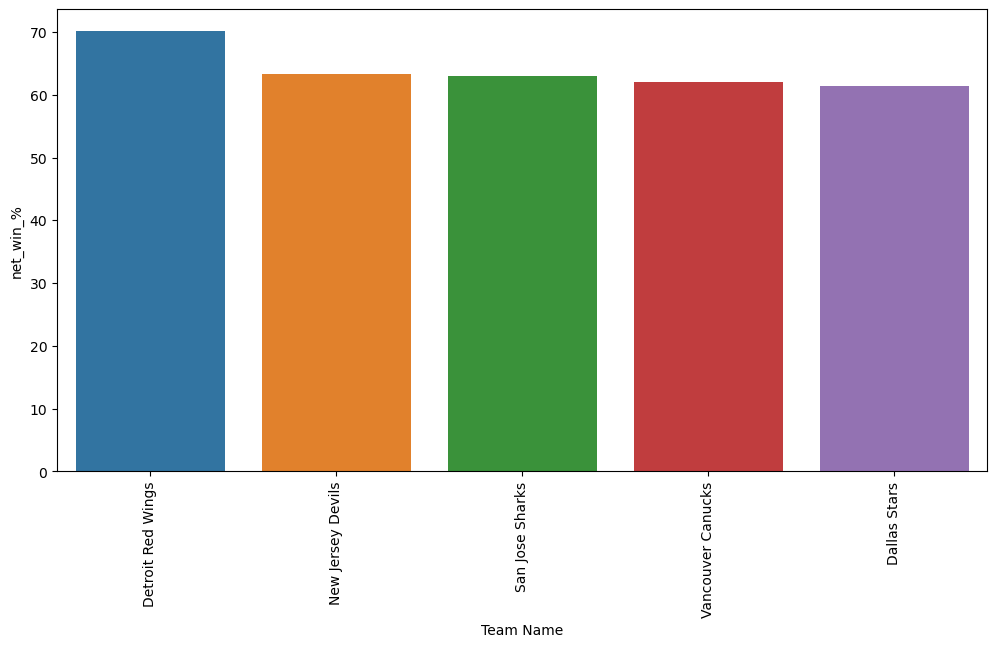

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(data= top5_teams, x= 'Team Name', y= 'net_win_%')
plt.xticks(rotation = 90)

#### All about team 'Detroit Red Wing'

In [34]:
red_wings= df1[(df1["Team Name"]=='Detroit Red Wings')]
red_wings

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
233,Detroit Red Wings,1999,48,22,2.0,0.585,278,210,68
262,Detroit Red Wings,2000,49,20,4.0,0.598,253,202,51
292,Detroit Red Wings,2001,51,17,4.0,0.622,251,187,64
322,Detroit Red Wings,2002,48,20,4.0,0.585,269,203,66
352,Detroit Red Wings,2003,48,21,2.0,0.585,255,189,66
382,Detroit Red Wings,2005,58,16,8.0,0.707,305,209,96
412,Detroit Red Wings,2006,50,19,13.0,0.610,254,199,55
442,Detroit Red Wings,2007,54,21,7.0,0.659,257,184,73
472,Detroit Red Wings,2008,51,21,10.0,0.622,295,244,51
502,Detroit Red Wings,2009,44,24,14.0,0.537,229,216,13


C:\Users\3V\anaconda3\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Wins')

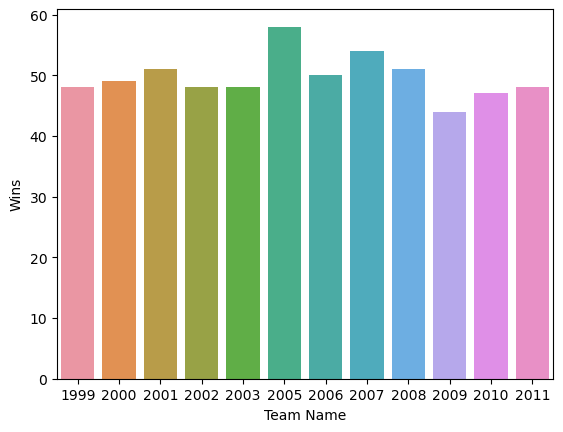

In [36]:
sns.barplot(red_wings['Year'],df1['Wins'])
plt.xlabel('Team Name')
plt.ylabel('Wins')


<AxesSubplot:xlabel='Year', ylabel='+ / -'>

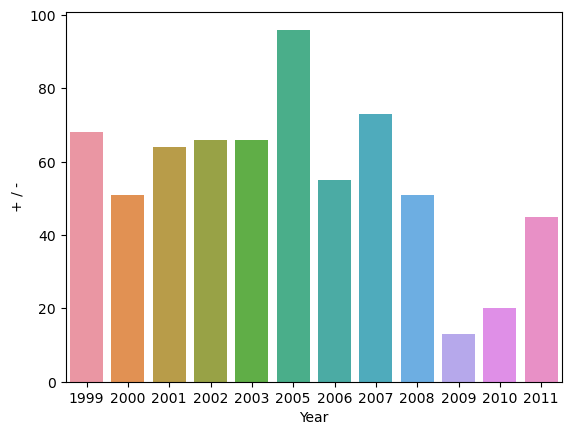

In [37]:
sns.barplot(data=red_wings, x= 'Year',y= '+ / -')

Text(0, 0.5, 'Wins and Losses')

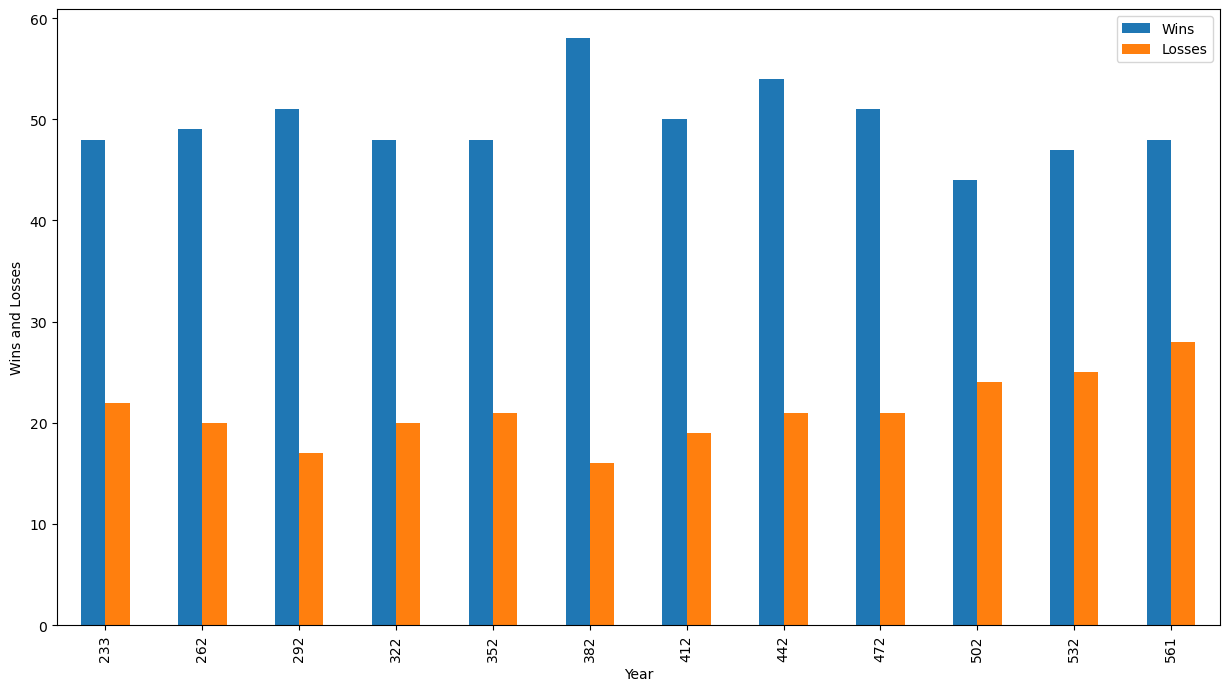

In [39]:
red_wings[['Wins','Losses']].plot(kind='bar', figsize=(15,8))
plt.xlabel('Year')
plt.ylabel('Wins and Losses')

In [43]:
df1[df1['Year']>2000]

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
282,Mighty Ducks of Anaheim,2001,29,42,3.0,0.354,175,198,-23
283,Atlanta Thrashers,2001,19,47,5.0,0.232,187,288,-101
284,Boston Bruins,2001,43,24,9.0,0.524,236,201,35
285,Buffalo Sabres,2001,35,35,1.0,0.427,213,200,13
286,Calgary Flames,2001,32,35,3.0,0.390,201,220,-19
...,...,...,...,...,...,...,...,...,...
577,Tampa Bay Lightning,2011,38,36,8.0,0.463,235,281,-46
578,Toronto Maple Leafs,2011,35,37,10.0,0.427,231,264,-33
579,Vancouver Canucks,2011,51,22,9.0,0.622,249,198,51
580,Washington Capitals,2011,42,32,8.0,0.512,222,230,-8


In [48]:
df1.groupby(by='Team Name')

In [53]:
Bottom_team = df1.sort_values(by= 'Win %', ascending= True)

In [56]:
Bottom_team[Bottom_team['Year']==2011]

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
557,Columbus Blue Jackets,2011,29,46,7.0,0.354,202,262,-60
566,Montreal Canadiens,2011,31,35,16.0,0.378,212,226,-14
562,Edmonton Oilers,2011,32,40,10.0,0.390,212,239,-27
556,Carolina Hurricanes,2011,33,33,16.0,0.402,213,243,-30
552,Anaheim Ducks,2011,34,36,12.0,0.415,204,231,-27
569,New York Islanders,2011,34,37,11.0,0.415,203,255,-52
565,Minnesota Wild,2011,35,36,11.0,0.427,177,226,-49
578,Toronto Maple Leafs,2011,35,37,10.0,0.427,231,264,-33
555,Calgary Flames,2011,37,29,16.0,0.451,202,226,-24
581,Winnipeg Jets,2011,37,35,10.0,0.451,225,246,-21


#### Above Results shows that team 'Columbus Blue Jackets ' has lowest win % in year 2011 